## Assignment

Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

Ans: The key features of the wine quality data set are

1.fixed acidity	2.volatile acidity	3.citric acid	4.residual sugar	5.chlorides	6.free sulfur dioxide	7.total sulfur dioxide	8.density	9.pH	10.sulphates	11.alcohol	and 12.quality

These features are important in predicting wine quality because they provide information about various chemical and physical properties of the wine. By analyzing these features, machine learning algorithms can learn patterns and relationships to predict the overall quality or assign quality scores to different wines

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Ans:Actually there was no missing value present in the dataset.So we didn't have to handle that kind of data. 

Msan or median imputation

Advantages:

It is simple and easy to impelement. it also preserves the overall distribution of the variable.

Disadvantages

It Ignores any relationships or patterns between the missing variable and other variables. and it can lead to an underestimation of the variance if the missing data is not missing completely at random (MCAR).

Mode imputation:

Advantages:

it is suitable for imputing categorical or nominal variables and preserves the mode (most frequent value) of the variable.

Disadvantages:

It ignores any relationships or patterns between the missing variable and other variables and it can lead to biased results if the mode is an outlier or if the missingness is related to other variables.

Q3 .What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

Ans: 
1.gender	2.race_ethnicity	3.parental_level_of_education	4.lunch	5.test_preparation_course	6.math_score	7.reading_score	8.writing_score
These are the key factors that efffect students performance in exam.

The steps are :
1st we will collect the relevant data then we will select the variable,
after that we will conduct exploratory data analysis to examine the distributions, correlations, and summary statistics of the variables.Then we will use appropriate statistical techniques to model the relationships between the factors and students' exam performance. And finally we will evaluate the statistical models and draw our conclusuion.


Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Ans:
We collect the data then we read the dataset, then we Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column.
And finally we got from the datset that from the above description of numerical data,all means are very close to each other- between 66 and 69
All the standard deviation are also close- between 14.6- 15.19
While there is a minimum of 0 for maths,other are having 17 and 10 value.
Then we also got to know that female student tend to perform well than male students. Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male of female. In general parent's education don't help student perform well in exam.
3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
2nd plot we can see there is no effect of parent's education on female students. Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female. This is how we did featre engineering here. 

 we select and transform the data using pandas , seaborn, and numpy libraries.
 
[ ]




Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
for column in df.columns:
    data = df[column].values
    _, p_value = stats.shapiro(data)
    alpha = 0.05  # significance level

In [6]:
if p_value < alpha:
        print(f"The feature '{column}' does not follow a normal distribution.")
else:
        print(f"The feature '{column}' follows a normal distribution.")

The feature 'quality' does not follow a normal distribution.


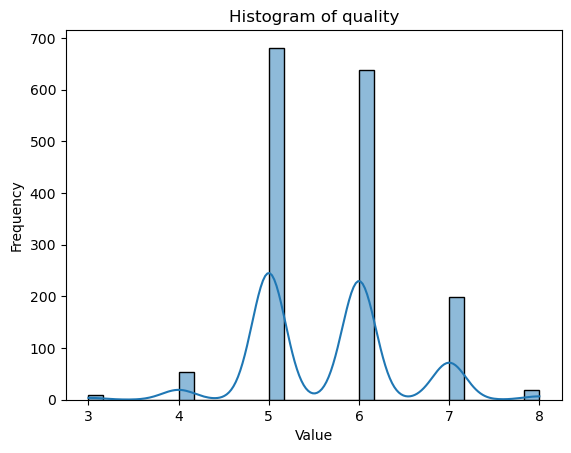

In [7]:
import seaborn as sns
sns.histplot(data, bins='auto',kde= True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of {column}")
plt.show()

We will perform box-cox transformation to improve its normality

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
columns = df.columns

target_column = None
for column in columns:
    # Add your own criteria to identify the target column
    if "target" in column.lower():
        target_column = column
        break

# Print the target column
print("Target Column:", target_column)


features = df.drop('target_column', axis=1)

# If necessary, scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Instantiate PCA object
pca = PCA()

# Fit PCA on the scaled features
pca.fit(scaled_features)

# Access the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Determine the number of components to retain based on explained variance
# You can choose a threshold or a desired number of components
# For example, retain components explaining 90% of the variance
n_components = (cumulative_explained_variance >= 0.90).sum()

# Apply dimensionality reduction to the scaled features
reduced_features = pca.transform(scaled_features)[:, :n_components]

# Create a new DataFrame with the reduced features
df_reduced = pd.DataFrame(data=reduced_features, columns=[f"PC{i+1}" for i in range(n_components)])

# Concatenate the reduced features with the target variable (if applicable)
# df_reduced = pd.concat([df_reduced, target], axis=1)

# Print the number of retained components
print(f"Number of retained components: {n_components}")

# Print the explained variance ratio and cumulative explained variance
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f}")

print("Cumulative Explained Variance:")
for i, variance in enumerate(cumulative_explained_variance):
    print(f"Component {i+1}: {variance:.4f}")


Target Column: None


KeyError: "['target_column'] not found in axis"

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you have your data stored in a DataFrame 'df'
# Extract the numerical data from the DataFrame
data = df.select_dtypes(include=[np.number]).values

# Standardize the data
data_std = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Create a PCA instance
pca = PCA()

# Fit the PCA model on the standardized data
pca.fit(data_std)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the first component that explains at least 90% of the variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1

print("Minimum number of principal components to explain 90% of variance:", n_components)


Minimum number of principal components to explain 90% of variance: 8
